## <center>Exploração de dados de cotações das Ações listadas na B3</center>

#### O Quando os valores outlires do retorno empaquetam no retorno acumulado de uma ação.

In [40]:
# Imports

# Manipulação dos dados
import numpy as np
import pandas as pd

# Cotações das Ações
import yfinance as yf

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Sistema
import sys
import os

# Ignore Warning(Avisos)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [41]:
# Vamos adicionar o caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('../modulos/')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [42]:
# Fontes para os gráficos

font_title = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

font_ylabel = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

font_xlabel = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

#### Ticker da Ação | Data inicial e final da coleta dos dados das cotações

In [43]:
ticker = 'ITSA4'
dt_inicial = '2014-01-01'

#### Coleta das cotações e Verificando/Tratando os valores ausentes

In [44]:
df = yf.download(f'{ticker}.SA', start=dt_inicial, threads=False, progress=False)

# Amostra dos dados
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-21,8.47,8.58,8.38,8.56,8.56,14112500.0
2022-07-22,8.58,8.60,8.39,8.47,8.47,12064900.0
2022-07-25,8.50,8.59,8.49,8.54,8.54,10114300.0
2022-07-26,8.52,8.61,8.44,8.52,8.52,9558200.0
2022-07-27,8.54,8.59,8.49,8.56,8.56,11124200.0


In [45]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2130 entries, 2014-01-02 to 2022-07-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2129 non-null   float64
 1   High       2129 non-null   float64
 2   Low        2129 non-null   float64
 3   Close      2129 non-null   float64
 4   Adj Close  2129 non-null   float64
 5   Volume     2129 non-null   float64
dtypes: float64(6)
memory usage: 116.5 KB


In [46]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [47]:
# Verificando alguns dados de medida central
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2.129000e+03
mean,8.909536,9.016420,8.793221,8.904702,7.325381,2.489558e+07
std,2.136707,2.149327,2.116011,2.135756,2.513373,1.272354e+07
min,4.910443,4.965177,4.886985,4.910443,3.286014,0.000000e+00
25%,7.029440,7.123270,6.935610,7.042316,4.697306,1.651420e+07
50%,9.009523,9.108225,8.885714,8.987012,7.628932,2.215359e+07
75%,10.571428,10.704761,10.476190,10.600000,9.523807,3.018270e+07
max,13.523809,13.695238,13.447619,13.666666,12.219231,1.227457e+08


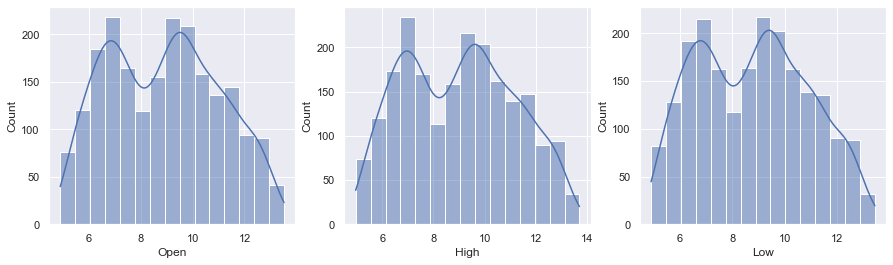

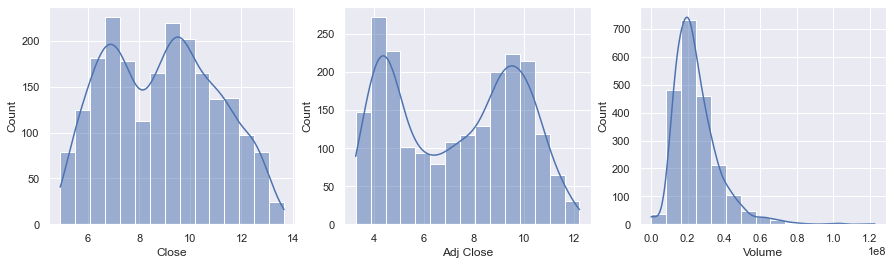

In [48]:
# Histograma das variáveis
figura1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
figura2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(df['Open'], bins=15, kde=True, ax=ax1)
sns.histplot(df['High'], bins=15, kde=True, ax=ax2)
sns.histplot(df['Low'], bins=15, kde=True, ax=ax3)
sns.histplot(df['Close'], bins=15, kde=True, ax=ax4)
sns.histplot(df['Adj Close'], bins=15, kde=True, ax=ax5)
sns.histplot(df['Volume'], bins=15, kde=True, ax=ax6)
plt.show()

In [49]:
# Vamos realizar a imputação dos dados ausentes pela mediana
df['Open'].fillna(df['Open'].median(), inplace=True)
df['High'].fillna(df['High'].median(), inplace=True)
df['Low'].fillna(df['Low'].median(), inplace=True)
df['Close'].fillna(df['Close'].median(), inplace=True)
df['Adj Close'].fillna(df['Adj Close'].median(), inplace=True)
df['Volume'].fillna(df['Volume'].median(), inplace=True)

In [50]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Criando novas variáveis (Retorno)

In [51]:
# Criando a variável de retorno
df['Retorno'] = round(df['Adj Close'].pct_change() * 100, 2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Retorno
Date,,,,,,,
2014-01-02,5.734564,5.766673,5.612552,5.638239,3.581270,15945191.0,NaN
2014-01-03,5.638239,5.696034,5.606131,5.657504,3.593507,15756456.0,0.34
2014-01-06,5.631817,5.728143,5.631817,5.696034,3.617979,16779396.0,0.68
2014-01-07,5.689613,5.747408,5.657504,5.676769,3.605743,20329554.0,-0.34
2014-01-08,5.676769,5.728143,5.644661,5.708878,3.626137,20823817.0,0.57


#### Trantando valores ausentes variável (Retorno)

In [52]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Retorno      1
dtype: int64

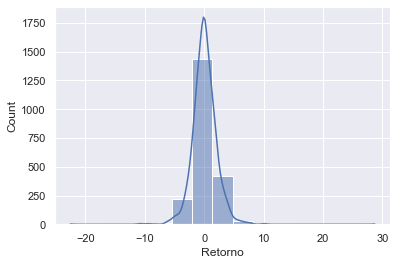

In [53]:
# Histograma da variável
sns.histplot(df['Retorno'], bins=15, kde=True)
plt.show()

In [54]:
# Vamos realizar a imputação dos dados ausentes pela média
df['Retorno'].fillna(df['Retorno'].mean(), inplace=True)

In [55]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Retorno      0
dtype: int64

#### Verificando e Substituindo (Replace) os outlires

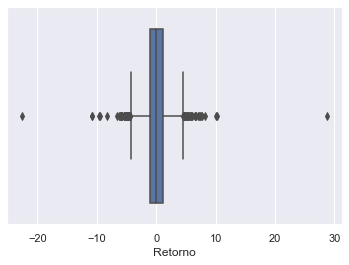

In [56]:
df_rep_outlires = df.copy() # Fazendo uma cópia do DataFrame 'original'

# Plot
sns.boxplot(df_rep_outlires['Retorno'])
plt.show()

In [57]:
trata_rep_outliers = TrataOutlier(df_rep_outlires)

lista_colunas = df_rep_outlires.select_dtypes('float64').columns.tolist()

lista_colunas

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Retorno']

In [58]:
trata_rep_outliers.getOverview(lista_colunas)

Nome de Coluna,Volume,Retorno,Open,High,Low,Close,Adj Close
Min,0.0,-22.54,4.910443,4.965177,4.886985,4.910443,3.286014
Q1,16514396.25,-1.0575,7.031395,7.125029,6.935692,7.042316,4.697775
Median,22153593.0,0.0,9.009523,9.108225,8.885714,8.987012,7.628932
Q3,30177650.0,1.15,10.571428,10.703895,10.474642,10.597619,9.523807
Max,122745735.0,28.75,13.523809,13.695238,13.447619,13.666666,12.219231
IQR,13663253.75,2.2075,3.540034,3.578866,3.538951,3.555303,4.826031
Lower fence,-3980484.375,-4.36875,1.721344,1.756731,1.627266,1.709361,-2.541272
Upper fence,50672530.625,4.46125,15.881479,16.072193,15.783068,15.930574,16.762854
Skew,1.876412,0.601571,0.113625,0.105801,0.119014,0.116701,-0.040838
Num_Outliers,83,77,0,0,0,0,0


In [59]:
# Replace dos outliers 
# Trocando os valores outliers pelo Q1 e Q3 respectivamente
trata_rep_outliers.replace_outliers_with_fences(lista_colunas)

In [60]:
# Visão geral dos outliers
trata_rep_outliers.getOverview(lista_colunas)

Nome de Coluna,Open,High,Low,Close,Adj Close,Volume,Retorno
Min,4.910443,4.965177,4.886985,4.910443,3.286014,0.0,-4.36875
Q1,7.031395,7.125029,6.935692,7.042316,4.697775,16514396.25,-1.0575
Median,9.009523,9.108225,8.885714,8.987012,7.628932,22153593.0,0.0
Q3,10.571428,10.703895,10.474642,10.597619,9.523807,30177650.0,1.15
Max,13.523809,13.695238,13.447619,13.666666,12.219231,50672530.625,4.46125
IQR,3.540034,3.578866,3.538951,3.555303,4.826031,13663253.75,2.2075
Lower fence,1.721344,1.756731,1.627266,1.709361,-2.541272,-3980484.375,-4.36875
Upper fence,15.881479,16.072193,15.783068,15.930574,16.762854,50672530.625,4.46125
Skew,0.113625,0.105801,0.119014,0.116701,-0.040838,0.734379,0.063496
Num_Outliers,0,0,0,0,0,0,0


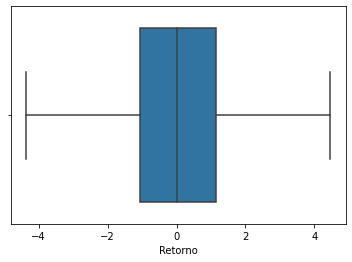

In [22]:
# Plot 
sns.boxplot(df_rep_outlires['Retorno'])
plt.show()

## Fazendo a comparação do retorno acumulado com e sem os outliers

* Os valores outlires não foram removidos e sim substituidos pelo Q1 e Q3 respectivamente

In [61]:
df_rep_outlires['Total_Retorno_Com_Outlier'] = df['Retorno'].cumsum()
df_rep_outlires['Total_Retorno_Sem_Outliers'] = df_rep_outlires['Retorno'].cumsum()
df_rep_outlires.tail()

,Open,High,Low,Close,Adj Close,Volume,Retorno,Total_Retorno_Com_Outlier,Total_Retorno_Sem_Outliers
Date,,,,,,,,,
2022-07-21,8.47,8.58,8.38,8.56,8.56,14112500.0,1.18,134.72326,127.40951
2022-07-22,8.58,8.60,8.39,8.47,8.47,12064900.0,-1.05,133.67326,126.35951
2022-07-25,8.50,8.59,8.49,8.54,8.54,10114300.0,0.83,134.50326,127.18951
2022-07-26,8.52,8.61,8.44,8.52,8.52,9558200.0,-0.23,134.27326,126.95951
2022-07-27,8.54,8.59,8.49,8.56,8.56,11124200.0,0.47,134.74326,127.42951


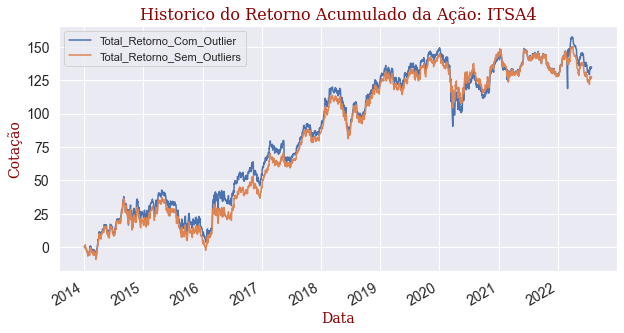

In [62]:
df_rep_outlires[['Total_Retorno_Com_Outlier','Total_Retorno_Sem_Outliers']].plot(figsize = (10, 5))
plt.title(f'Historico do Retorno Acumulado da Ação: {ticker}', fontdict=font_title)
plt.ylabel('Cotação', fontdict=font_ylabel)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontdict=font_xlabel)
plt.xticks(fontsize=14)
plt.legend()
plt.show()

#### Verificando e removendo os outlires

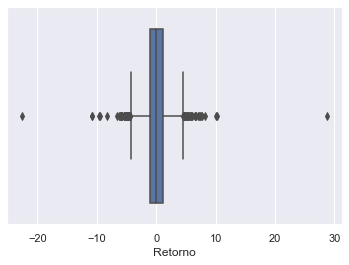

,Date,Retorno
0,2014-01-02,0.06326
1,2014-01-03,0.34000
2,2014-01-06,0.68000
3,2014-01-07,-0.34000
4,2014-01-08,0.57000
...,...,...
2125,2022-07-21,1.18000
2126,2022-07-22,-1.05000
2127,2022-07-25,0.83000
2128,2022-07-26,-0.23000


In [88]:
# Fazendo uma cópia do DataFrame 'original'
df_rev_outlires = df.copy() 

df_emp_outlires = pd.DataFrame(df_rev_outlires['Retorno']) 

# Plot
sns.boxplot(df_emp_outlires['Retorno'])
plt.show()

# Criando um novo index
df_emp_outlires.reset_index(inplace=True)
df_emp_outlires

In [89]:
#IQR - Realizando o calculo do IQR e removendo os outlires
Q1 = np.percentile(df_emp_outlires['Retorno'], 25, interpolation='midpoint')
Q3 = np.percentile(df_emp_outlires['Retorno'], 75, interpolation='midpoint')

IQR = Q3 - Q1

print('Shape:', df_emp_outlires.shape)
shape = len(df_emp_outlires)

upper = np.where(df_emp_outlires['Retorno'] >= (Q3 + 1.5 * IQR)) 
lower = np.where(df_emp_outlires['Retorno'] <= (Q1 - 1.5 * IQR)) 
df_emp_outlires.drop(upper[0], inplace=True)
df_emp_outlires.drop(lower[0], inplace=True)

print('New Shape:', df_emp_outlires.shape)
newShape = len(df_emp_outlires)

print('Qtd. Outlires:', shape - newShape)

Shape: (2130, 2)
New Shape: (2053, 2)
Qtd. Outlires: 77


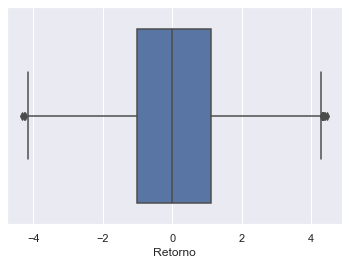

In [90]:
# Colocando a coluna 'Date' como index do DataFrame
df_emp_outlires.set_index('Date', inplace=True)

# Plot
sns.boxplot(df_emp_outlires['Retorno'])
plt.show()

In [91]:
# Inserindo no DataFrame principal os dados de retorno sem os outlires
df_rev_outlires['Retorno1'] = df_emp_outlires['Retorno']

# Alterando os valores NaN por 0
df_rev_outlires.fillna(0, inplace=True)

In [92]:
# Verificando se a dados ausentes
df_rev_outlires.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Retorno      0
Retorno1     0
dtype: int64

In [93]:
# Criando as variáveis de retorno acumulado
df_rev_outlires['Total_Retorno_Com_Outliers'] = df_rev_outlires['Retorno'].cumsum()
df_rev_outlires['Total_Retorno_Sem_Outliers'] = df_rev_outlires['Retorno1'].cumsum()
df_rev_outlires.tail()

,Open,High,Low,Close,Adj Close,Volume,Retorno,Retorno1,Total_Retorno_Com_Outliers,Total_Retorno_Sem_Outliers
Date,,,,,,,,,,
2022-07-21,8.47,8.58,8.38,8.56,8.56,14112500.0,1.18,1.18,134.72326,145.92326
2022-07-22,8.58,8.60,8.39,8.47,8.47,12064900.0,-1.05,-1.05,133.67326,144.87326
2022-07-25,8.50,8.59,8.49,8.54,8.54,10114300.0,0.83,0.83,134.50326,145.70326
2022-07-26,8.52,8.61,8.44,8.52,8.52,9558200.0,-0.23,-0.23,134.27326,145.47326
2022-07-27,8.54,8.59,8.49,8.56,8.56,11124200.0,0.47,0.47,134.74326,145.94326


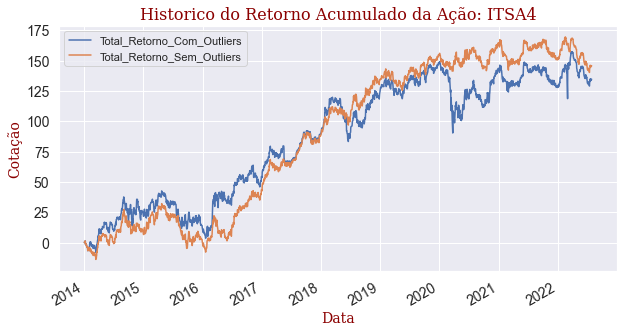

In [94]:
df_rev_outlires[['Total_Retorno_Com_Outliers','Total_Retorno_Sem_Outliers']].plot(figsize = (10, 5))
plt.title(f'Historico do Retorno Acumulado da Ação: {ticker}', fontdict=font_title)
plt.ylabel('Cotação', fontdict=font_ylabel)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontdict=font_xlabel)
plt.xticks(fontsize=14)
plt.legend()
plt.show()